In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('adult_data.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
new_column_names = [
    'Age',
    'Workclass',
    'Fnlwgt',
    'Education',
    'Education-num',
    'Marital-status',
    'Occupation',
    'Relationship',
    'Race',
    'Sex',
    'Capital-gain',
    'Capital-loss',
    'Hours-per-week',
    'Native-country',
    'Income'
]

# Rename the columns
df.columns = new_column_names

In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
class_counts = df['Income'].value_counts()
print("Class Counts:\n", class_counts)

# Calculate class ratios
class_ratio = class_counts / class_counts.sum()
print("\nClass Ratios:\n", class_ratio)

# Check for imbalance threshold
threshold = 0.7  # Define threshold
if (class_ratio.max() > threshold):
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")


Class Counts:
 Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

Class Ratios:
 Income
 <=50K    0.759183
 >50K     0.240817
Name: count, dtype: float64
The dataset is imbalanced.


In [7]:
unique_values = df.nunique()
print(unique_values)

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education-num        16
Marital-status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-gain        119
Capital-loss         92
Hours-per-week       94
Native-country       42
Income                2
dtype: int64


In [8]:
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-num   32560 non-null  int64 
 5   Marital-status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital-gain    32560 non-null  int64 
 11  Capital-loss    32560 non-null  int64 
 12  Hours-per-week  32560 non-null  int64 
 13  Native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


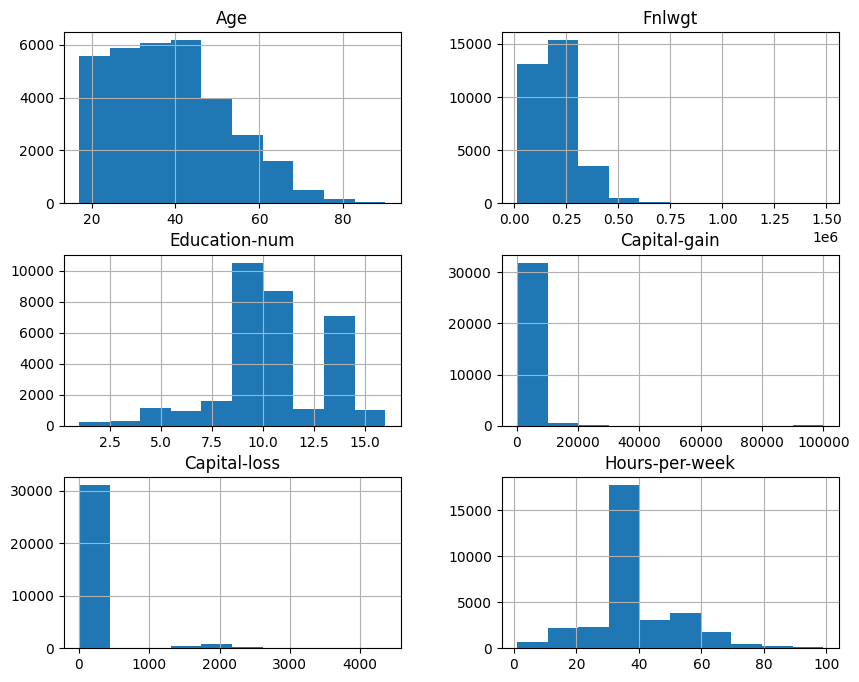

In [10]:
df.hist(figsize=(10, 8))
plt.show()

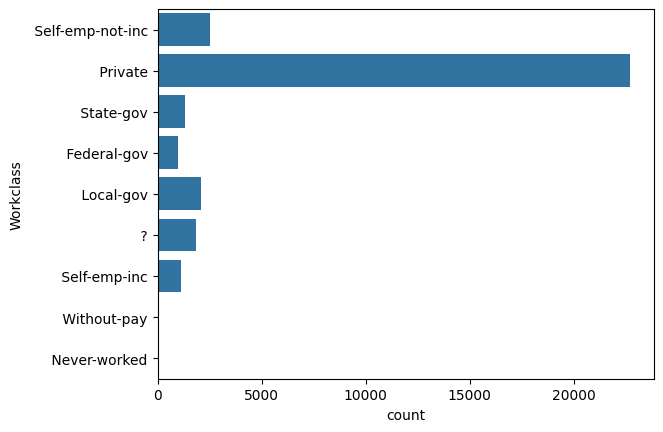

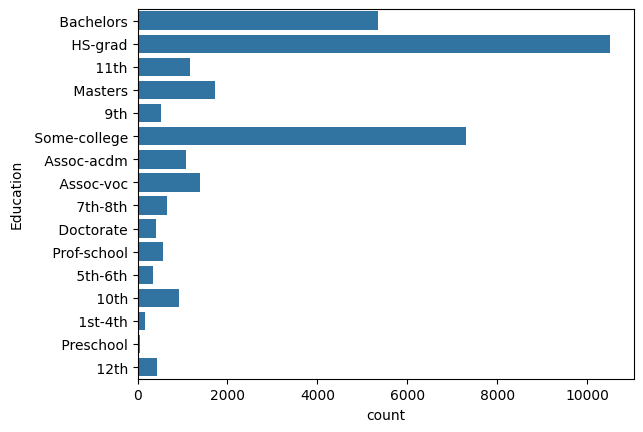

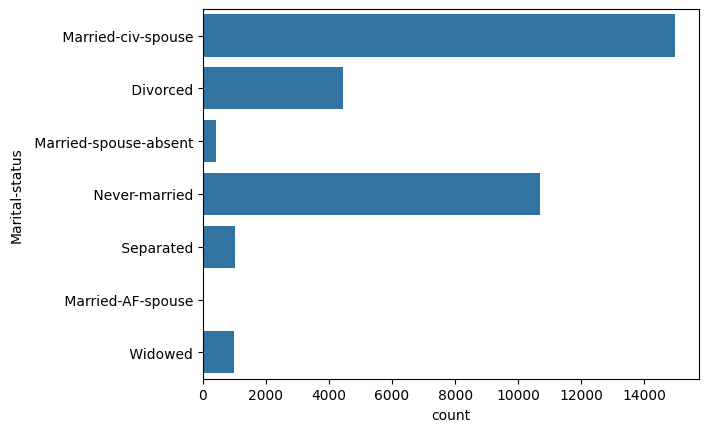

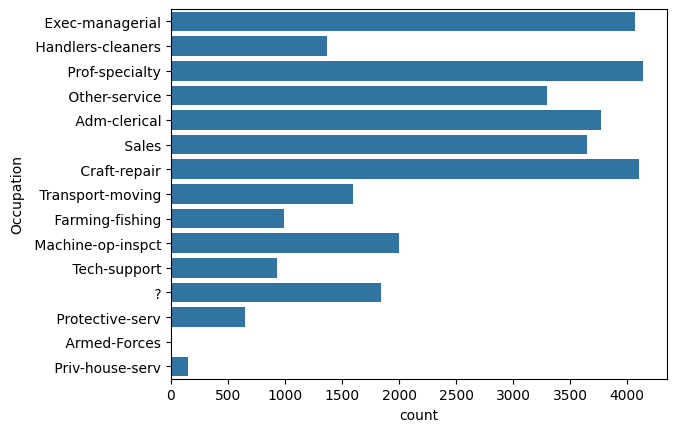

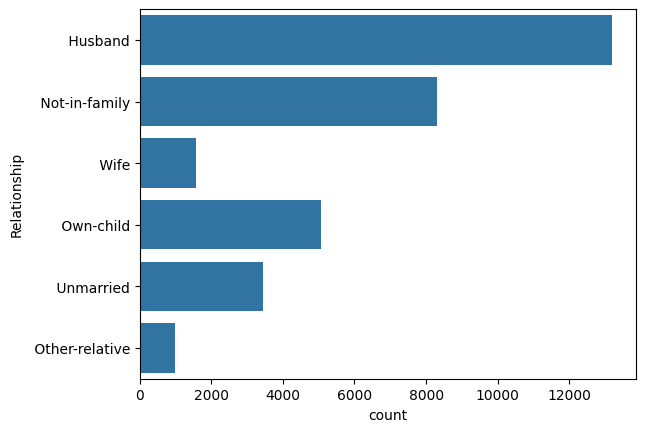

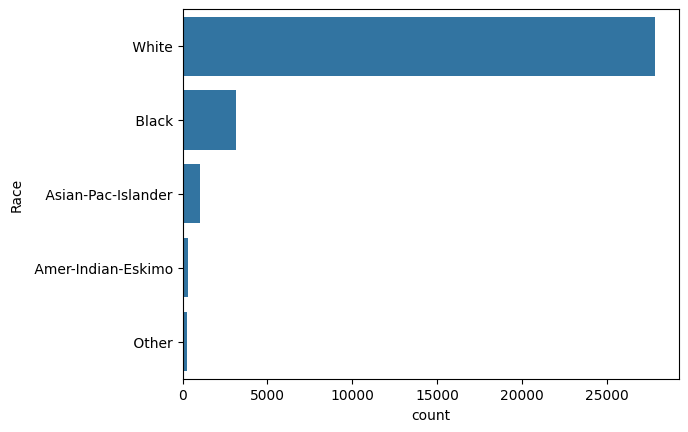

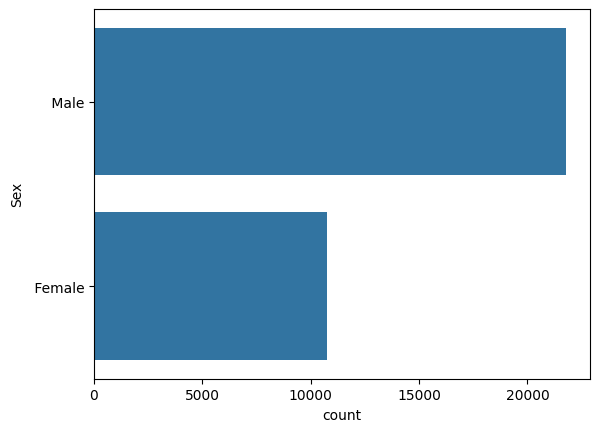

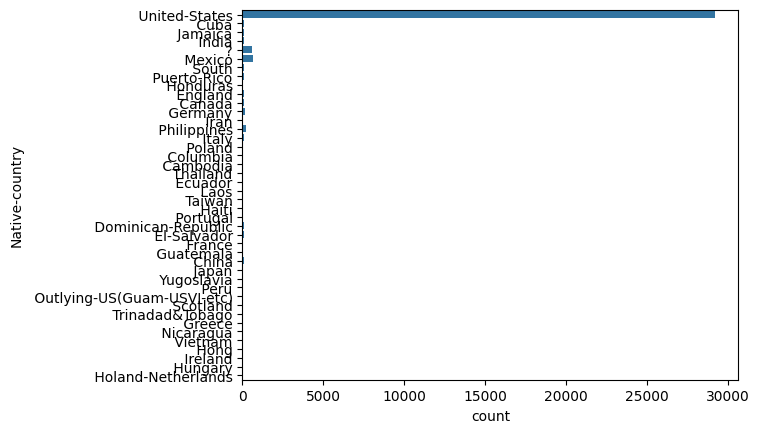

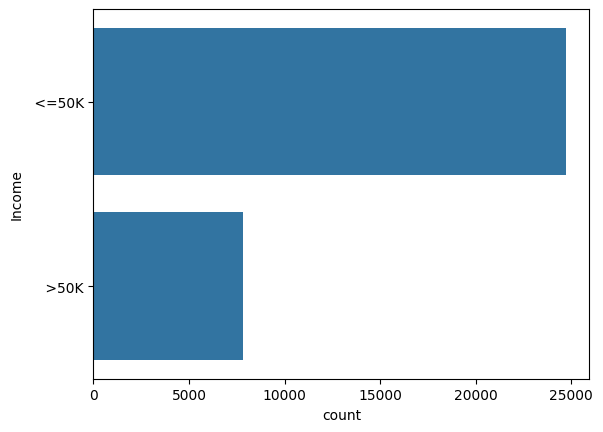

In [11]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df)
    plt.show()

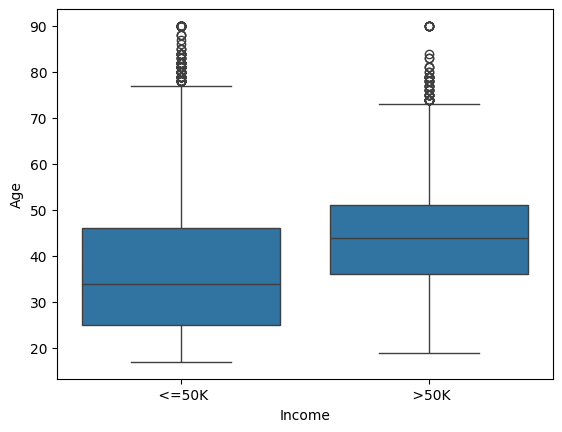

In [12]:
sns.boxplot(x='Income', y='Age', data=df)
plt.show()


In [13]:
#sns.pairplot(df, hue='Income')
#plt.show()


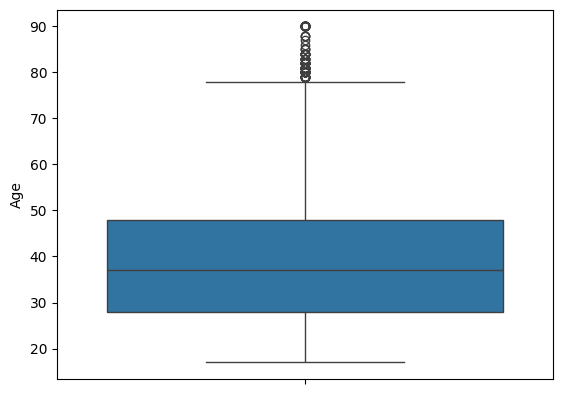

In [14]:
sns.boxplot(df['Age'])
plt.show()

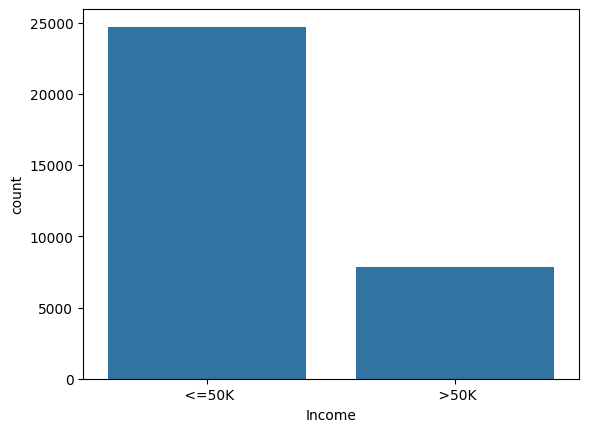

In [15]:
sns.countplot(x='Income', data=df)
plt.show()

In [16]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [17]:
from sklearn.preprocessing import LabelEncoder

"""label_encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col]) <<< Code

Note    : Not using for loop to encode all 'object' dtype columns
Reason  : Doing it maually for better inception, and see which values are assigning to label."""

"label_encoder = LabelEncoder()\n\nfor col in df.select_dtypes(include='object').columns:\n    df[col] = label_encoder.fit_transform(df[col]) <<< Code\n\nNote    : Not using for loop to encode all 'object' dtype columns\nReason  : Doing it maually for better inception, and see which values are assigning to label."

In [18]:
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}


In [19]:
df['Education'] = le.fit_transform(df['Education'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}


In [20]:
df['Marital-status'] = le.fit_transform(df['Marital-status'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}


In [21]:
df['Occupation'] = le.fit_transform(df['Occupation'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, ' Transport-moving': 14}


In [22]:
df['Relationship'] = le.fit_transform(df['Relationship'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}


In [23]:
df['Race'] = le.fit_transform(df['Race'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}


In [24]:
df['Sex'] = le.fit_transform(df['Sex'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' Female': 0, ' Male': 1}


In [25]:
df['Native-country'] = le.fit_transform(df['Native-country'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' ?': 0, ' Cambodia': 1, ' Canada': 2, ' China': 3, ' Columbia': 4, ' Cuba': 5, ' Dominican-Republic': 6, ' Ecuador': 7, ' El-Salvador': 8, ' England': 9, ' France': 10, ' Germany': 11, ' Greece': 12, ' Guatemala': 13, ' Haiti': 14, ' Holand-Netherlands': 15, ' Honduras': 16, ' Hong': 17, ' Hungary': 18, ' India': 19, ' Iran': 20, ' Ireland': 21, ' Italy': 22, ' Jamaica': 23, ' Japan': 24, ' Laos': 25, ' Mexico': 26, ' Nicaragua': 27, ' Outlying-US(Guam-USVI-etc)': 28, ' Peru': 29, ' Philippines': 30, ' Poland': 31, ' Portugal': 32, ' Puerto-Rico': 33, ' Scotland': 34, ' South': 35, ' Taiwan': 36, ' Thailand': 37, ' Trinadad&Tobago': 38, ' United-States': 39, ' Vietnam': 40, ' Yugoslavia': 41}


In [26]:
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])
workclass_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Workclass Mapping: ", workclass_mapping)

Workclass Mapping:  {' <=50K': 0, ' >50K': 1}


In [27]:
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']] = scaler.fit_transform(
    df[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Model's Accuracy: 84.21%


In [32]:
input_text = [[50,	6, 83311,	9,	13,	2,	7,	0,	4,	1,	0,	0,	13,	39]]
input_text = scaler.fit_transform(input_text)
model.predict(input_text)
if model.predict(input_text) == 0:
    print("Predicred Anual Imcome is <=50K")
else:
    print("Predicred Anual Imcome is  >50K")

Predicred Anual Imcome is  >50K


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
import joblib

joblib.dump(model, 'model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']